# Cubic Bonus
This challenge involved a model taking in input in a certain shape and outputting a series of probabilities. 

Upon initial examination, we noticed it was behaving similar to the way Genigma was during the prelims. Thus, (and I really do apologize to Rob once again for the use of google sheets), we decided to probe every possible location with a high value to see what was being activated.

In [8]:
# Helpers
CRUCIBLE_API_KEY = ""  # Replace with your actual API key
CHALLENGE = "cubic"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://cubic.crucible.dreadnode.io"
from IPython.display import Image, display


In [ ]:
import requests
import numpy as np


def query_model(input_data):
    response = requests.post(
        f"{CHALLENGE_URL}/predict",
        headers={"X-API-Key": CRUCIBLE_API_KEY},
        json={"data": input_data},
    )
    return response.json()
# Function to transform the list into a grid string
def list_to_grid_string(lst, rows=1, cols=64):
    grid = []
    for i in range(rows):
        row = lst[i*cols:(i+1)*cols]
        grid.append('\t'.join(map(str, row)))
    return '\n'.join(grid)

input_data = np.random.randint(0, 25, size=(64, 1))
print(input_data.tolist())

newlist = [[0] for _ in input_data] # creates a zeroed list for us to tamper with
mx = []
a = 100
b = 11
# Probe every single point that the model can evaluate
for i in range(0, 64):
    newlist[i][0] = a
    input_data = newlist
    print(input_data)
    response = query_model(input_data)
    print(response.get('prediction')[b])
    newlist[i][0] = 0
    mx.append(response.get('prediction')[b][0])


Once we had that run, we converted it to a format that would be pasteable in google sheets. After noticing that only one of the changes to input was affecting output, we decided to probe everything with a value of 100 (arbitrarily high). Then, we pasted it into sheets, converting it with the function below


In [ ]:
grid_string = list_to_grid_string(mx)
print(grid_string)

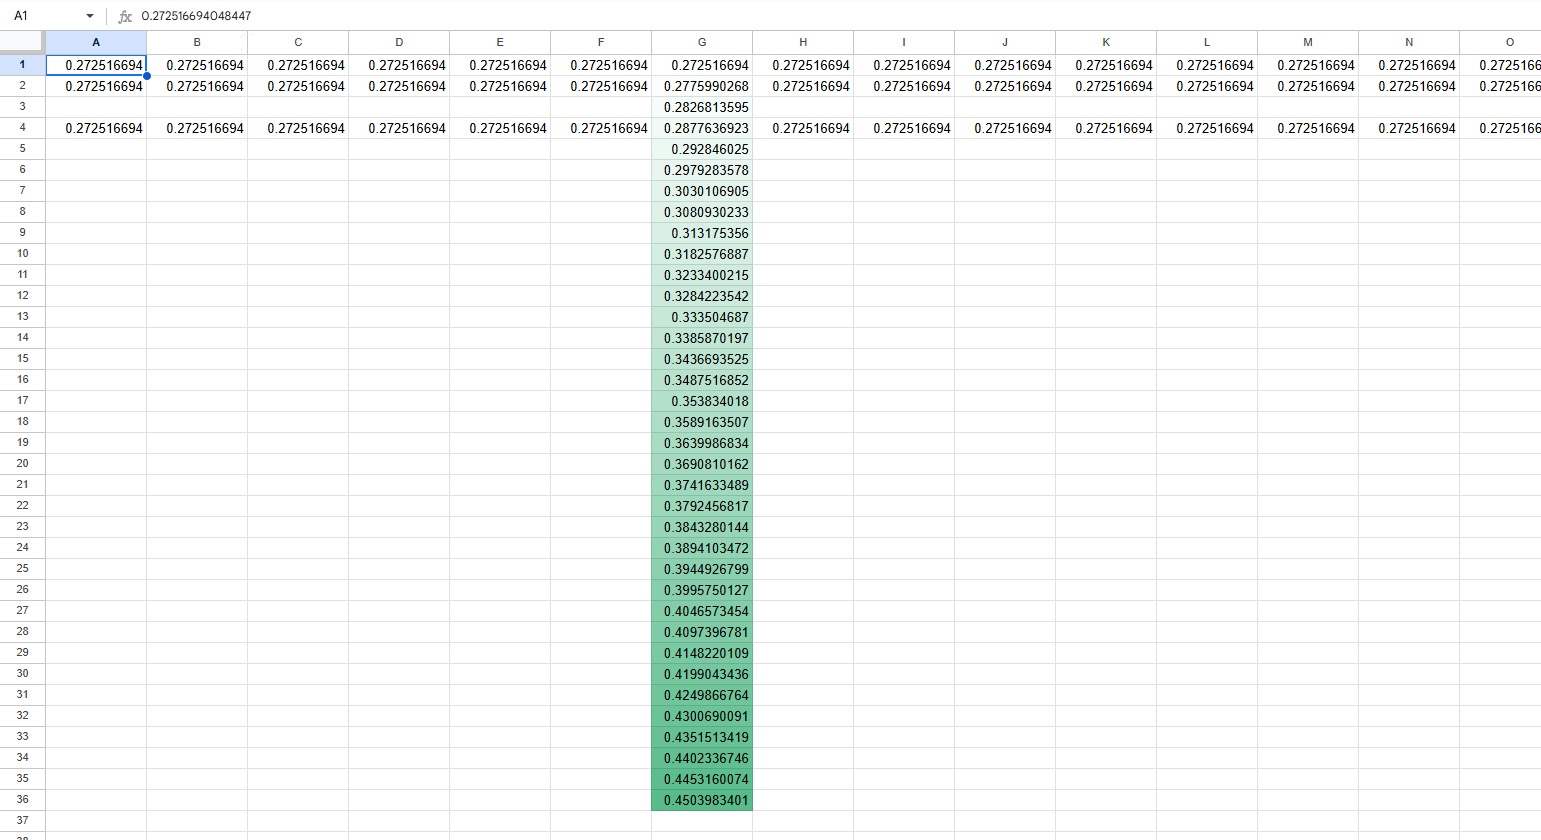

In [9]:
display(Image(filename="cubic1.png"))

We then probed all outputs for their spike value and recorded all the outputs:

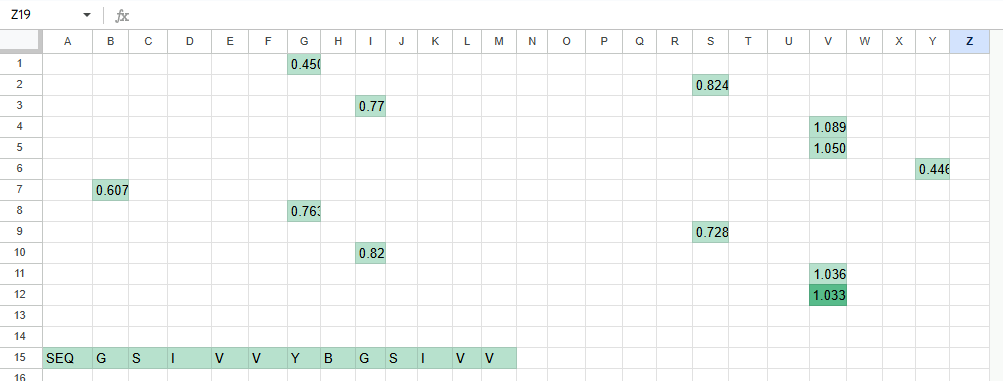

In [10]:
display(Image(filename="cubic2.png"))

Dumping this into o1-preview returned the following:

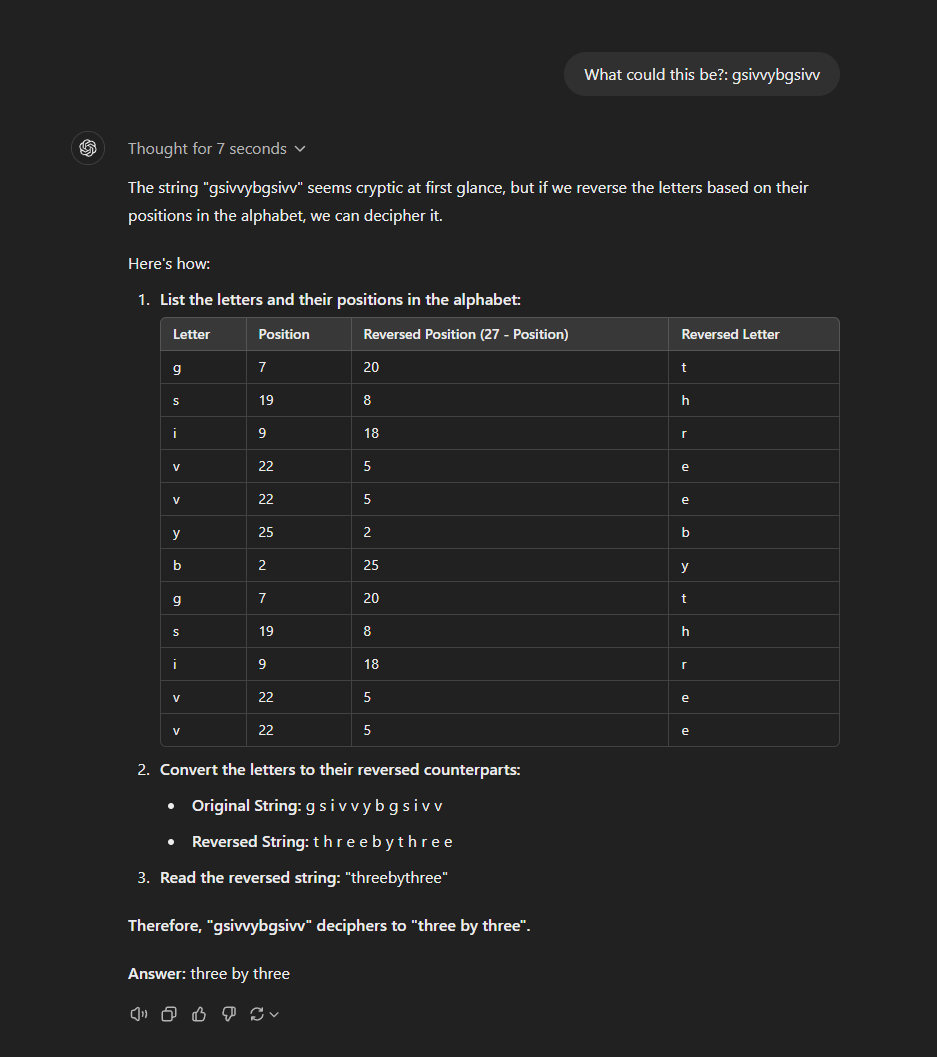

In [11]:
display(Image(filename="cubic3.png"))

Which, when concatenated and placed in capitals (THREEBYTHREE) gave us the flag.